In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# # Number of rows
# num_rows = 1000000

# # Create sample data with 1,000,000 rows
# data = {
#     'Timestamp': pd.date_range(start='2022-01-01', periods=num_rows, freq='S'),
#     'Ticker': (['AAPL', 'GOOGL', 'MSFT', 'BTC', 'ETH', 'XRP'] * ((num_rows // 6) + 1))[:num_rows],
#     'Price': ([150, 2500, 300, 155, 2550, 310] * ((num_rows // 6) + 1))[:num_rows],
#     'Volume': ([100, 200, 150, 110, 210, 160] * ((num_rows // 6) + 1))[:num_rows],
#     'Buy/Sell': (['Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell'] * ((num_rows // 6) + 1))[:num_rows],
#     'Trader_ID': (['T1', 'T2', 'T3', 'T4', 'T5', 'T6'] * ((num_rows // 6) + 1))[:num_rows],
#     'Exchange': (['NYSE', 'NASDAQ', 'NYSE', 'Binance', 'Bybit', 'Coinbase'] * ((num_rows // 6) + 1))[:num_rows]
# }

# # Convert the dictionary into a DataFrame
# df = pd.DataFrame(data)
# df.to_csv("Exchange_Trade_Data.csv")
exchange_df = pd.read_csv("Exchange_Trade_Data.csv")
exchange_df.info()

In [ ]:
#info

In [ ]:
#head
exchange_df.head()
exchange_df.sample(30)

In [ ]:
#groupby - Sum

#exchange_df.groupby('Ticker').sum()
#exchange_df.groupby('Ticker')['Volume'].sum()

volume_sum = {}

tickers = exchange_df['Ticker'].unique()
for ticker in tickers:
    sum_volume = exchange_df[exchange_df['Ticker'] == ticker]['Volume'].sum()
    volume_sum[ticker] = sum_volume
volume_sum


In [ ]:
exchange_df.groupby('Ticker')['Volume'].sum()

In [ ]:
tickers = exchange_df.groupby('Ticker')
tickers.size()

In [ ]:
# GroupBy Attributes and Methods
# find total number of groups -> len
# find items in each group -> size
# first()/last() -> nth item
# get_group -> vs filtering
# groups
# describe
# sample
# nunique

In [ ]:
tickers

In [ ]:
tickers.first()
tickers.last()
tickers.nth(5)

In [ ]:
tickers.get_group('BTC')

#exchange_df[exchange_df['Ticker'] == "BTC"]

In [ ]:
tickers.groups

In [ ]:
exchange_df.head(20)

In [ ]:
tickers.describe()

In [ ]:
tickers.sample(5)

In [ ]:
tickers.nunique()

In [ ]:
# agg method
# passing dict
tickers.agg({
    'Volume':'sum',
    'Price' :'max'

})

In [ ]:
# passing list
tickers[['Volume','Price']].agg(['sum','mean'])

In [ ]:
# Adding both the syntax

tickers.agg({
    'Volume':['sum','mean','std'],
    'Price' :['max','min','mean']

})

In [ ]:
# looping on groups

for group,data in tickers:
    print((data['Ticker'].unique()))

In [ ]:
# split (apply) combine
# apply -> builtin function
tickers.apply(max)

In [ ]:
# groupby on multiple cols
exchange_df.groupby(['Ticker','Buy/Sell','Exchange']).size()
# size

# get_group
exchange_df.groupby(['Ticker','Buy/Sell','Exchange']).get_group(('ETH','Buy','Bybit'))

ticker_exchange = exchange_df.groupby(['Ticker','Buy/Sell','Exchange'])

In [84]:
# agg on multiple groupby
ticker_exchange.agg(['max','min'])

Unnamed: 0                Timestamp  \
                                max min                  max   
Ticker Buy/Sell Exchange                                       
AAPL   Buy      NYSE         999996   0  2022-01-12 13:46:36   
BTC    Sell     Binance      999999   3  2022-01-12 13:46:39   
ETH    Buy      Bybit        999994   4  2022-01-12 13:46:34   
GOOGL  Sell     NASDAQ       999997   1  2022-01-12 13:46:37   
MSFT   Buy      NYSE         999998   2  2022-01-12 13:46:38   
XRP    Sell     Coinbase     999995   5  2022-01-12 13:46:35   

                                              Price       Volume       \
                                          min   max   min    max  min   
Ticker Buy/Sell Exchange                                                
AAPL   Buy      NYSE      2022-01-01 00:00:00   150   150    100  100   
BTC    Sell     Binance   2022-01-01 00:00:03   155   155    110  110   
ETH    Buy      Bybit     2022-01-01 00:00:04  2550  2550    210  210   
GOOGL  Sell     NASDAQ    2022-01-01 00:00:01  2500  2500    200  200   
MSFT   Buy      NYSE      2022-01-01 00:00:02   300   300    150  150   
XRP    Sell     Coinbase  2022-01-01 00:00:05   310   310    160  160   

                         Trader_ID      
                               max min  
Ticker Buy/Sell Exchange                
AAPL   Buy      NYSE            T1  T1  
BTC    Sell     Binance         T4  T4  
ETH    Buy      Bybit           T5  T5  
GOOGL  Sell     NASDAQ          T2  T2  
MSFT   Buy      NYSE            T3  T3  
XRP    Sell     Coinbase        T6  T6

### Excercise

- How many trades were executed for each ticker?
- What is the average price of each ticker?
- What is the total volume traded for each ticker?
- What is the price of the first trade for each ticker?
- What is the total trading volume on each exchange for each hour of the day?
- What is the total buy and sell volume for each ticker?
- Calculate the VWAP for each ticker


In [109]:
exchange_df['Timestamp']

0         2022-01-01 00:00:00
1         2022-01-01 00:00:01
2         2022-01-01 00:00:02
3         2022-01-01 00:00:03
4         2022-01-01 00:00:04
                 ...         
999995    2022-01-12 13:46:35
999996    2022-01-12 13:46:36
999997    2022-01-12 13:46:37
999998    2022-01-12 13:46:38
999999    2022-01-12 13:46:39
Name: Timestamp, Length: 1000000, dtype: object

In [ ]:
exchange_df.groupby('Ticker').size()

In [99]:
exchange_df.groupby('Ticker')['Price'].mean()

Ticker
AAPL      150.0
BTC       155.0
ETH      2550.0
GOOGL    2500.0
MSFT      300.0
XRP       310.0
Name: Price, dtype: float64

In [100]:
exchange_df.groupby('Ticker')['Volume'].sum()

Ticker
AAPL     16666700
BTC      18333370
ETH      34999860
GOOGL    33333400
MSFT     25000050
XRP      26666560
Name: Volume, dtype: int64

In [103]:
exchange_df.groupby('Ticker')['Price'].first()

Ticker
AAPL      150
BTC       155
ETH      2550
GOOGL    2500
MSFT      300
XRP       310
Name: Price, dtype: int64

In [117]:
exchange_df['Hour'] =  pd.to_datetime(exchange_df['Timestamp']).dt.hour

In [118]:
exchange_df

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange,Hour
0,0,2022-01-01 00:00:00,AAPL,150,100,Buy,T1,NYSE,0
1,1,2022-01-01 00:00:01,GOOGL,2500,200,Sell,T2,NASDAQ,0
2,2,2022-01-01 00:00:02,MSFT,300,150,Buy,T3,NYSE,0
3,3,2022-01-01 00:00:03,BTC,155,110,Sell,T4,Binance,0
4,4,2022-01-01 00:00:04,ETH,2550,210,Buy,T5,Bybit,0
...,...,...,...,...,...,...,...,...,...
999995,999995,2022-01-12 13:46:35,XRP,310,160,Sell,T6,Coinbase,13
999996,999996,2022-01-12 13:46:36,AAPL,150,100,Buy,T1,NYSE,13
999997,999997,2022-01-12 13:46:37,GOOGL,2500,200,Sell,T2,NASDAQ,13
999998,999998,2022-01-12 13:46:38,MSFT,300,150,Buy,T3,NYSE,13


In [121]:
exchange_df.groupby(['Volume','Hour'])['Volume'].sum()

Volume  Hour
100     0        720000
        1        720000
        2        720000
        3        720000
        4        720000
                 ...   
210     19      1386000
        20      1386000
        21      1386000
        22      1386000
        23      1386000
Name: Volume, Length: 144, dtype: int64

In [128]:
Buy_Volume = exchange_df[exchange_df['Buy/Sell'] == 'Buy'].groupby('Ticker')['Volume'].sum()
Sell_Volume = exchange_df[exchange_df['Buy/Sell'] == 'Sell'].groupby('Ticker')['Volume'].sum()

In [129]:
print(Buy_Volume)
print(Sell_Volume)

Ticker
AAPL    16666700
ETH     34999860
MSFT    25000050
Name: Volume, dtype: int64
Ticker
BTC      18333370
GOOGL    33333400
XRP      26666560
Name: Volume, dtype: int64


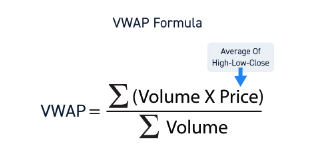

In [134]:
exchange_df.groupby('Ticker').apply(lambda x :(x['Volume']*x['Price']).sum()/x['Volume'].sum())

/var/folders/d0/zpksyyln31xcrk5dycg4_4n40000gp/T/ipykernel_5666/289306447.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  exchange_df.groupby('Ticker').apply(lambda x :(x['Volume']*x['Price']).sum()/x['Volume'].sum())


Ticker
AAPL      150.0
BTC       155.0
ETH      2550.0
GOOGL    2500.0
MSFT      300.0
XRP       310.0
dtype: float64

In [131]:
exchange_df

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange,Hour
0,0,2022-01-01 00:00:00,AAPL,150,100,Buy,T1,NYSE,0
1,1,2022-01-01 00:00:01,GOOGL,2500,200,Sell,T2,NASDAQ,0
2,2,2022-01-01 00:00:02,MSFT,300,150,Buy,T3,NYSE,0
3,3,2022-01-01 00:00:03,BTC,155,110,Sell,T4,Binance,0
4,4,2022-01-01 00:00:04,ETH,2550,210,Buy,T5,Bybit,0
...,...,...,...,...,...,...,...,...,...
999995,999995,2022-01-12 13:46:35,XRP,310,160,Sell,T6,Coinbase,13
999996,999996,2022-01-12 13:46:36,AAPL,150,100,Buy,T1,NYSE,13
999997,999997,2022-01-12 13:46:37,GOOGL,2500,200,Sell,T2,NASDAQ,13
999998,999998,2022-01-12 13:46:38,MSFT,300,150,Buy,T3,NYSE,13
